In [88]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

In [89]:
# Load dataset

path = os.path.join(os.getcwd(), 'W3/w3classif.csv')

data = pd.read_csv(path, names=["X1", "X2", "Y"])

In [90]:
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data
X_train, X_holdout, y_train, y_holdout = train_test_split(data.iloc[:, : -1],data.iloc[:, -1], test_size=0.3)

# Q1

Fit a single Decision Tree classifier to the training data

In [91]:
from sklearn.tree import DecisionTreeClassifier

# TODO: Fit a single Decision Tree classifier to the training data with default parameters
tree =DecisionTreeClassifier()

tree.fit(X_train, y_train)

# TODO: Predict on training and holdout sets

predict_train_tree = tree.predict(X_train)
predict_holdout_tree = tree.predict(X_holdout)

# TODO: Calculate Etrain and Ehold-out

Etrain_tree = ((predict_train_tree != y_train) + 0).sum() / y_train.size
Eholdout_tree = ((predict_holdout_tree != y_holdout) + 0).sum() / y_holdout.size

# Print the results
print("Etrain:", Etrain_tree)
print("Ehold-out:", Eholdout_tree)


Etrain: 0.0
Ehold-out: 0.05


# Q2

Fit a bagging ensemble method to the same training data using the Random Forest algorithm

In [92]:
from sklearn.ensemble import RandomForestClassifier

# TODO: Fit a Random Forest ensemble with 100 trees
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# TODO: Predict on training and holdout sets

predict_train_forest = forest.predict(X_train)
preidct_holdout_forest = forest.predict(X_holdout)

# TODO: Calculate Etrain and Ehold-out

Etrain_forest = ((predict_train_forest != y_train) + 0).sum() / y_train.size
Eholdout_forest = ((preidct_holdout_forest != y_holdout) + 0).sum() / y_holdout.size

# Print the results
print("Etrain:", Etrain_forest)
print("Ehold-out:", Eholdout_forest)

Etrain: 0.0
Ehold-out: 0.041666666666666664


# Q3

Repeat DecisionTreeClassifier for different depths and plot the train errors

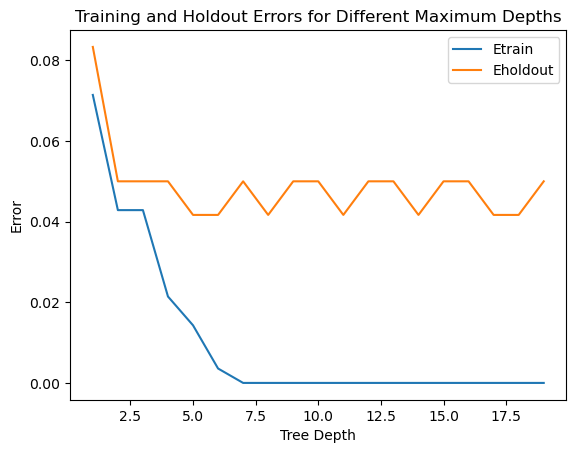

In [93]:
depths = np.arange(1, 20)
Etrain_tree_depths = []
Eholdout_tree_depths = []

# TODO: train a DecisionTreeClassifier with different depths and record the errors
for depth in depths:
  # TODO: Fit the model

  model = DecisionTreeClassifier(max_depth=depth)
  model.fit(X_train, y_train)

  # TODO: Predict on training and holdout sets

  predict_train = model.predict(X_train)
  predict_holdout = model.predict(X_holdout)

  # TODO: Calculate Etrain and Ehold-out

  Etrain = ((predict_train != y_train) + 0).sum() / y_train.size
  Eholdout = ((predict_holdout != y_holdout) + 0).sum() / y_holdout.size

  Etrain_tree_depths.append(Etrain)
  Eholdout_tree_depths.append(Eholdout)

plt.plot(depths, Etrain_tree_depths, label="Etrain")
plt.plot(depths, Eholdout_tree_depths, label="Eholdout")
plt.xlabel("Tree Depth")
plt.ylabel("Error")
plt.title('Training and Holdout Errors for Different Maximum Depths')
plt.legend()
plt.show()


Repeat RandomForestClassifier for different ensemble sizes and plot the train error

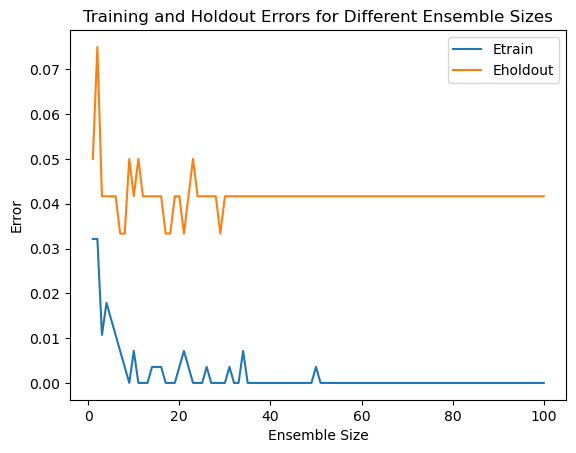

In [94]:
ensemble_sizes = np.arange(1, 101)
Etrain_forest_sizes = []
Eholdout_forest_sizes = []

# TODO: train a RandomForestClassifier with different estimator sizes and record the errors
for size in ensemble_sizes:
  # TODO: Fit the model

  model = RandomForestClassifier(n_estimators=size)
  model.fit(X_train, y_train)

  # TODO: Predict on training and holdout sets

  predict_train = model.predict(X_train)
  predict_holdout = model.predict(X_holdout)

  # TODO: Calculate Etrain and Ehold-out

  Etrain = ((predict_train != y_train) + 0).sum() / y_train.size
  Eholdout = ((predict_holdout != y_holdout) + 0).sum() / y_holdout.size

  Etrain_forest_sizes.append(Etrain)
  Eholdout_forest_sizes.append(Eholdout)

plt.plot(ensemble_sizes, Etrain_forest_sizes, label="Etrain")
plt.plot(ensemble_sizes, Eholdout_forest_sizes, label="Eholdout")
plt.xlabel("Ensemble Size")
plt.ylabel("Error")
plt.title('Training and Holdout Errors for Different Ensemble Sizes')
plt.legend()
plt.show()


# Q4

Generate a much larger version of the dataset as data: for each input variable, half of the input data points (for class 0) are drawn from a Normal distribution with mean = 0 and standard deviation = 1, the other half (for class 1) from a Normal distribution with mean = 3 and standard deviation = 1.5.

In [95]:
from sklearn.utils import resample 

In [96]:
N = 5000 # size of the dataset

# TODO: Generate a much larger version of the dataset with specified means and variances from a normal distribution

X1_0 = np.array(np.random.normal(0, 1, size=N // 2))
X2_0 = np.array(np.random.normal(0, 1, size=N // 2))
y_0 = np.array(np.zeros(N // 2, dtype=int))

X1_1 = np.array(np.random.normal(3, 1.5, size=N // 2))
X2_1 = np.array(np.random.normal(3, 1.5, size=N // 2))
y_1 = np.array(np.ones(N // 2, dtype=int))

# TODO: Combine the data into a single DataFrame

X1 = np.concatenate((X1_0, X1_1))
X2 = np.concatenate((X2_0, X2_1))
y = np.concatenate((y_0, y_1))

d = {'X1' : X1, 'X2' : X2, 'y' : y}

df = pd.DataFrame(data=d)

# TODO: Shuffle the dataset

df_shuffled = df.sample(frac=1)

Split your large dataset into (e.g 10) equal parts. Consider each part as your holdout set and remaining 9 parts as your training set, and fit a decision tree model. Calculate the variance for each model, and for the final model.

In [97]:
num_parts = 10
# TODO: Split the data into 10 equal parts

datasets = np.array_split(df_shuffled, num_parts)

# Initialize lists to store errors
Etrain_tree_parts = []
Eholdout_tree_parts = []

# Loop through each part as the holdout set
for i in range(num_parts):
  # TODO: Extract the ith part as the holdout set

  holdout = datasets[i]

  # TODO: Combine the remaining parts as the training set

  training = pd.concat([datasets[j] for j in range(num_parts) if j != i])

  # TODO: Fit a decision tree on the training set

  X_train = training.iloc[:, : -1]
  y_train = training.iloc[:, -1]

  X_holdout = holdout.iloc[:, : -1]
  y_holdout = holdout.iloc[:, -1]

  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  # TODO: Predict on the training and holdout sets

  predict_train = model.predict(X_train)
  predict_holdout = model.predict(X_holdout)


  # TODO: Calculate Etrain and Eholdout

  Etrain_tree = ((predict_train != y_train) + 0).sum() / y_train.size
  Eholdout_tree = ((predict_holdout != y_holdout) + 0).sum() / y_holdout.size

  Etrain_tree_parts.append(Etrain_tree)
  Eholdout_tree_parts.append(Eholdout_tree)

# TODO: Calculate the final variance of the error

Etrain_tree_variance = np.array(Etrain_tree_parts).var()
Eholdout_tree_variance = np.array(Eholdout_tree_parts).var()

Etrain_tree_mean = np.array(Etrain_tree_parts).mean()
Eholdout_tree_mean = np.array(Eholdout_tree_parts).mean()

# Print the result
print("Final mean of the train error:", Etrain_tree_mean)
print("Final mean of the holdout error:", Eholdout_tree_mean)


Final mean of the train error: 0.0
Final mean of the holdout error: 0.06260000000000002


Repeat the above with a Random Forest Classifier

In [98]:
# TODO: Shuffle the large dataset again

df_shuffled = df.sample(frac=1)

# TODO: Split the data into 10 equal parts

datasets = np.array_split(df_shuffled, num_parts)

# Initialize lists to store errors
Etrain_forest_parts = []
Eholdout_forest_parts = []

# Loop through each part as the holdout set
for i in range(num_parts):
  # TODO: Extract the ith part as the holdout set

    holdout = datasets[i]

  # TODO: Combine the remaining parts as the training set

    training = pd.concat([datasets[j] for j in range(num_parts) if j != i])

  # TODO: Fit a random forest classifier on the training set

    X_train = training.iloc[:, : -1]
    y_train = training.iloc[:, -1]

    X_holdout = holdout.iloc[:, : -1]
    y_holdout = holdout.iloc[:, -1]

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

  # TODO: Predict on the training and holdout sets

    predict_train = model.predict(X_train)
    predict_holdout = model.predict(X_holdout)

  # TODO: Calculate Etrain and Eholdout

    Etrain_forest = ((predict_train != y_train) + 0).sum() / y_train.size
    Eholdout_forest = ((predict_holdout != y_holdout) + 0).sum() / y_holdout.size

    Etrain_forest_parts.append(Etrain_forest)
    Eholdout_forest_parts.append(Eholdout_forest)

# TODO: Calculate the final variance of the error

Etrain_forest_variance = np.array(Etrain_forest_parts).var()
Eholdout_forest_variance = np.array(Eholdout_forest_parts).var()

Etrain_forest_mean = np.array(Etrain_forest_parts).mean()
Eholdout_forest_mean = np.array(Eholdout_forest_parts).mean()

# Print the result
print("Final mean of the train error:", Etrain_forest_mean)
print("Final mean of the holdout error:", Eholdout_forest_mean)


Final mean of the train error: 2.2222222222222223e-05
Final mean of the holdout error: 0.0494


# Q5

Fit a boosting ensemble method to the initial training data using the AdaBoost algorithm. Calculate Etrain and Ehold-out for the ensemble.

In [99]:
from sklearn.ensemble import AdaBoostClassifier

# TODO: Fit an AdaBoost ensemble with 100 trees
boost = AdaBoostClassifier()

boost.fit(X_train, y_train)

# TODO: Predict on training and holdout sets

predict_train_boost = boost.predict(X_train)
predict_holdout_boost = boost.predict(X_holdout)

# TODO: Calculate Etrain and Ehold-out

Etrain_boost = ((predict_train_boost != y_train) + 0).sum() / y_train.size
Eholdout_boost = ((predict_holdout_boost != y_holdout) + 0).sum() / y_holdout.size


# Print the results
print("Etrain:", Etrain_boost)
print("Ehold-out:", Eholdout_boost)


Etrain: 0.03977777777777778
Ehold-out: 0.052
